<a href="https://colab.research.google.com/github/Dennis826/mit-dlaicourse/blob/master/Sklearn_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
sample_cnt= 32
data_x = np.linspace(start = 0, stop = sample_cnt/4, num = sample_cnt).reshape(-1, 1)
rand_n = np.random.randn(sample_cnt).reshape(-1, 1)

In [0]:
#print(data_x)
#print(rand_n)

Text(0, 0.5, 'curve_linear(data_x)')

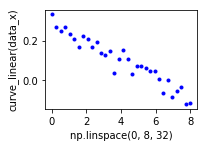

In [23]:
# curve using linear
#curve_linear = np.sin(data_x)
θ0, θ1 = 0.3, -0.05
curve_linear = yr = θ0 + θ1*data_x
curve_linear += rand_n * 0.03

plt.subplot(2, 2, 1)
plt.plot(data_x, curve_linear, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve_linear(data_x)")

Text(0, 0.5, 'curve_polynomial(data_x)')

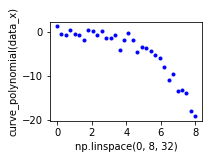

In [24]:
# curve using polynomial
θ0, θ1, θ2, θ3 = 0.1, -0.02, 0.03, -0.04
curve_polynomial = θ0 + θ1*data_x + θ2*(data_x**2) + θ3*(data_x**3)
curve_polynomial += rand_n

plt.subplot(2, 2, 2)
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve_polynomial(data_x)")

[0.29142306] [[-0.04811547]]


Text(0, 0.5, 'curve fitting using Linear')

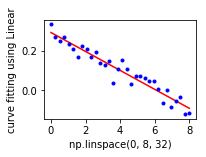

In [25]:
#fitting linear with Linear regression
linear_reg = LinearRegression()
linear_reg.fit(data_x, curve_linear)
print(linear_reg.intercept_, linear_reg.coef_)

fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear = np.dot(fit_x, linear_reg.coef_.T) + linear_reg.intercept_

plt.subplot(2, 2, 3)
plt.plot(fit_x, fit_linear, 'r-')
plt.plot(data_x, curve_linear, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Linear")

[3.53222908] [[-2.0454237]]


Text(0, 0.5, 'curve fitting using Linear')

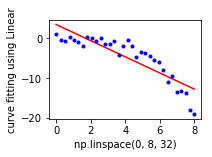

In [26]:
#fitting polynomial with Linear regression
linear_reg_fail = LinearRegression()
linear_reg_fail.fit(data_x, curve_polynomial)
print(linear_reg_fail.intercept_, linear_reg_fail.coef_) 

fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear_fail = np.dot(fit_x, linear_reg_fail.coef_.T) + linear_reg_fail.intercept_

plt.subplot(2, 2, 4)
plt.plot(fit_x, fit_linear_fail, 'r-')
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Linear")

In [27]:
hypo = np.dot(data_x, linear_reg.coef_.T) + linear_reg.intercept_
hypo_fail = np.dot(data_x, linear_reg_fail.coef_.T) + linear_reg_fail.intercept_
print(mean_squared_error(hypo, curve_linear))          # MSE of linear 
print(mean_squared_error(hypo_fail, curve_polynomial)) # MSE of polynimial

0.0010096010435381854
7.327378526152019


{'degree': 3, 'include_bias': True, 'interaction_only': False}


Text(0, 0.5, 'curve fitting using Polynomial')

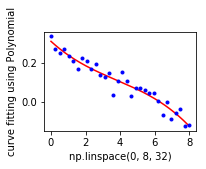

In [28]:
#fitting linear with Polynomial
poly_features_1 = PolynomialFeatures(degree = 3)
linear_reg = LinearRegression()
linear_reg.fit(poly_features_1.fit_transform(data_x), curve_linear)
print(poly_features_1.get_params())

fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear = linear_reg.predict(poly_features_1.fit_transform(fit_x))

plt.subplot(2, 2, 3)
plt.plot(fit_x, fit_linear, 'r-')
plt.plot(data_x, curve_linear, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Polynomial")

{'degree': 2, 'include_bias': True, 'interaction_only': False}
0.0008866263937750167
1.5845523659678935


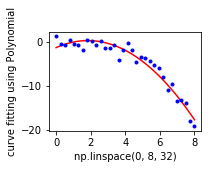

In [29]:
#fitting polynomial with Polynomial
poly_features_3 = PolynomialFeatures(degree = 2)
linear_reg_best = LinearRegression()
linear_reg_best.fit(poly_features_3.fit_transform(data_x), curve_polynomial)
print(poly_features_3.get_params())

fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear_best = linear_reg_best.predict(poly_features_3.fit_transform(fit_x))

plt.subplot(2, 2, 4)
plt.plot(fit_x, fit_linear_best, 'r-')
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Polynomial")

hypo = linear_reg.predict(poly_features_1.fit_transform(data_x))
hypo_best = linear_reg_best.predict(poly_features_3.fit_transform(data_x))
print(mean_squared_error(hypo, curve_linear))          # MSE
print(mean_squared_error(hypo_best, curve_polynomial)) # MSE

{'degree': 10, 'include_bias': True, 'interaction_only': False}
0.0008866263937750167
0.8639574506896626


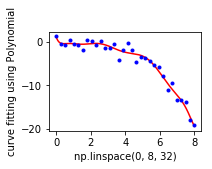

In [34]:
#fitting polynomial with Polynomial
poly_features_3 = PolynomialFeatures(degree = 10)
linear_reg_best = LinearRegression()
linear_reg_best.fit(poly_features_3.fit_transform(data_x), curve_polynomial)
print(poly_features_3.get_params())

fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear_best = linear_reg_best.predict(poly_features_3.fit_transform(fit_x))

plt.subplot(2, 2, 4)
plt.plot(fit_x, fit_linear_best, 'r-')
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Polynomial")

hypo = linear_reg.predict(poly_features_1.fit_transform(data_x))
hypo_best = linear_reg_best.predict(poly_features_3.fit_transform(data_x))
print(mean_squared_error(hypo, curve_linear))          # MSE
print(mean_squared_error(hypo_best, curve_polynomial)) # MSE

{'degree': 3, 'include_bias': True, 'interaction_only': False}
0.0008866263937750167
0.9851404375277965


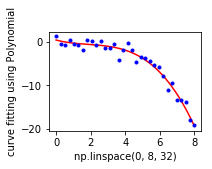

In [31]:
#fitting polynomial with Polynomial
poly_features_3 = PolynomialFeatures(degree = 3)
linear_reg_best = LinearRegression()
linear_reg_best.fit(poly_features_3.fit_transform(data_x), curve_polynomial)
print(poly_features_3.get_params())

fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear_best = linear_reg_best.predict(poly_features_3.fit_transform(fit_x))

plt.subplot(2, 2, 4)
plt.plot(fit_x, fit_linear_best, 'r-')
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Polynomial")

hypo = linear_reg.predict(poly_features_1.fit_transform(data_x))
hypo_best = linear_reg_best.predict(poly_features_3.fit_transform(data_x))
print(mean_squared_error(hypo, curve_linear))          # MSE
print(mean_squared_error(hypo_best, curve_polynomial)) # MSE